<a href="https://colab.research.google.com/github/dtuleva/DL_23_Lectures_and_Quests/blob/main/bonus_lecture_PyTorch_and__JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn # beware of namespace; there is nn in tensorflow and jax too
import torch.nn.functional  as F

from torchvision.datasets import CIFAR10
from torchvision import transforms as T





# PyTorch and JAX
### bonus lecture

## Torch

In [2]:
torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [3]:
torch.Tensor(2, 5) # 2, 5 is shape; makes a tensor that is not initialised; values are whatever happens to be in memory

tensor([[-2.6530e+04, -1.4582e-29, -1.0683e-30,  4.4556e-41,  1.4634e+27],
        [ 3.3328e-41,  2.7016e-01, -2.4773e+27, -1.0684e-30,  4.4556e-41]])

In [4]:
torch.zeros(2, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [5]:
torch.ones(2, 5)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [6]:
a = torch.rand((2000, 6)) # torch.random for other distributions
b = torch.rand((2000, 6))
w = torch.rand((6, 1)) # broadcasting - rank 1 tensor does not transpose properly (same as numpy)

In [7]:
a == b

tensor([[False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        ...,
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False]])

In [8]:
torch.all(a == b)

tensor(False)

In [9]:
torch.all((a + b) == torch.add(a, b))

tensor(True)

In [10]:
a @ b.T

tensor([[1.9679, 1.3703, 0.5412,  ..., 1.8931, 2.0269, 1.0519],
        [2.5619, 2.4325, 1.0554,  ..., 2.3591, 2.4811, 1.9754],
        [1.7998, 1.7647, 0.5770,  ..., 1.9659, 1.8367, 1.2914],
        ...,
        [2.5941, 2.5057, 0.8755,  ..., 2.5807, 2.3239, 2.1538],
        [2.1918, 2.0499, 0.7826,  ..., 2.1228, 2.1131, 1.5947],
        [1.4191, 1.6143, 0.5335,  ..., 1.6043, 1.3390, 1.4092]])

In [11]:
torch.matmul(b, a.T)

tensor([[1.9679, 2.5619, 1.7998,  ..., 2.5941, 2.1918, 1.4191],
        [1.3703, 2.4325, 1.7647,  ..., 2.5057, 2.0499, 1.6143],
        [0.5412, 1.0554, 0.5770,  ..., 0.8755, 0.7826, 0.5335],
        ...,
        [1.8931, 2.3591, 1.9659,  ..., 2.5807, 2.1228, 1.6043],
        [2.0269, 2.4811, 1.8367,  ..., 2.3239, 2.1131, 1.3390],
        [1.0519, 1.9754, 1.2914,  ..., 2.1538, 1.5947, 1.4092]])

In [12]:
(a @ w).shape

torch.Size([2000, 1])

In [13]:
z = a @ w + b

In [14]:
z.min()

tensor(0.2484)

In [15]:
torch.relu(z)

tensor([[1.9890, 1.9788, 2.1750, 1.6651, 2.1923, 2.1987],
        [2.7619, 2.7259, 2.3750, 2.5936, 2.6207, 2.1985],
        [1.4131, 1.6463, 1.3190, 1.2277, 1.2731, 1.3429],
        ...,
        [2.3195, 2.5820, 2.5913, 2.4421, 2.8830, 2.5196],
        [2.0280, 2.3811, 2.0429, 1.6231, 2.4666, 2.4353],
        [0.9770, 1.6427, 1.7317, 1.6054, 1.0499, 1.0413]])

In [16]:
x_np = np.linspace(-5, 5, 5000)
y_np = np.sin(x_np)

In [17]:
x_torch = torch.tensor(x_np)
type(x_torch)

torch.Tensor

In [18]:
# torch.sin(x_np) # cannot feed np array directly to torch function

TypeError: ignored

In [19]:
y_torch = torch.sin(x_torch)
# or
x_torch.sin()

tensor([ 0.9589,  0.9595,  0.9601,  ..., -0.9601, -0.9595, -0.9589],
       dtype=torch.float64)

In [20]:
# can be chained for unary operations
torch.all(x_torch.sin().cos()) == torch.all(torch.cos(torch.sin(x_torch)))

tensor(True)

In [21]:
x_torch[:4]

tensor([-5.0000, -4.9980, -4.9960, -4.9940], dtype=torch.float64)

In [22]:
a

tensor([[0.0384, 0.2375, 0.5277, 0.0180, 0.9075, 0.8341],
        [0.7880, 0.8561, 0.7752, 0.3091, 0.3838, 0.7539],
        [0.1276, 0.3420, 0.0805, 0.7693, 0.8514, 0.7210],
        ...,
        [0.5821, 0.4344, 0.9042, 0.8116, 0.6900, 0.6551],
        [0.5093, 0.4564, 0.4329, 0.6109, 0.5183, 0.8863],
        [0.1575, 0.4227, 0.2419, 0.8466, 0.4823, 0.3494]])

In [23]:
a[:, 1]

tensor([0.2375, 0.8561, 0.3420,  ..., 0.4344, 0.4564, 0.4227])

Gradients

In [24]:
y_torch

tensor([ 0.9589,  0.9595,  0.9601,  ..., -0.9601, -0.9595, -0.9589],
       dtype=torch.float64)

In [25]:
y_torch.requires_grad

False

In [26]:
type(y_torch.grad)

NoneType

In [27]:
x_torch = torch.tensor(x_np, requires_grad = True) # state that gradients are needed by initialisation / reinitialisation of variable
# x_torch = torch.tensor(x_torch, requires_grad = True)


In [28]:
y_torch = torch.sin(x_torch)

In [29]:
y_torch.backward()

RuntimeError: ignored

In [30]:
y_torch.grad

<ipython-input-30-8de13210a3da>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y_torch.grad


In [31]:
x_torch.grad

In [32]:
a = torch.tensor([2, 3, 5], dtype = float, requires_grad = True)
b = torch.tensor([8.0, 15, -2])


In [33]:
y = (2 * a ** 2 + 3 * b)** 3

In [34]:
y.backward(torch.tensor([1, 1, 1]))

In [35]:
a.grad

tensor([ 24576., 142884., 116160.], dtype=torch.float64)

In [36]:
b.grad is None

True

In [37]:
y.grad

<ipython-input-37-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y.grad


This way grad is directly calculated from scratch each time, not optimal for NN; even the same operation on same inputs is calculated again - slow and computationally expensive. What we need is compiling, which in pytorch is not defined very well (unlike tensorflow and jax)

In [38]:
mock_data = torch.rand((20, 2)) # need float tensors everywhere

In [39]:
fully_connected_layer = torch.nn.Linear(2, 3) # no input layer syntax sugar, need to explicitly state the in and output shapes, no inpit dynamic

In [40]:
z = fully_connected_layer(mock_data)

# equiv to tf.keras.layers.Dense(30)(mock_data)

In [41]:
z.min()

tensor(-0.3399, grad_fn=<MinBackward1>)

In [42]:
activation = torch.nn.functional.relu(z)

In [43]:
activation.min()

tensor(0., grad_fn=<MinBackward1>)

In [46]:
# torch.nn.MSELoss(activation, y_expected).backward()

In [47]:
mock_data = torch.rand((1, 28, 28))  # in pytorch images are (channels, height, width)
mock_labels = torch.rand(20, 10)

In [48]:
class CNN(nn.Module):
  def __init__(self): # only architecture, no functions (relu, ...) here
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3, padding = "same") # or kernel (3, 3)
    self.pool = nn.MaxPool2d(kernel_size = 2) # needs initialisation, but can be used multiple times after different layers (unlike tf)
    self.conv2 = nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 3)
    self.flatten = nn.Flatten()
    self.dense1 = nn.Linear(in_features = 6 * 6, out_features = 25) # need to calc in dimentions
    self.dense2 = nn.Linear(25, 10) # 10 as num classes

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.flatten(x)
    x = F.relu(self.dense1(x))
    x = self.dense2(x) # don't need activation, here crossenthropy works properly with direct input

    return x

In [49]:
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=36, out_features=25, bias=True)
  (dense2): Linear(in_features=25, out_features=10, bias=True)
)

In [50]:
model.forward(mock_data).shape

torch.Size([20, 10])

In [51]:
# model.forward(mock_data).view(-1, 1) # = reshape(whatever rows, 1 column)

In [52]:
# [param for param in model.parameters()] # trainable params

In [53]:
model

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=36, out_features=25, bias=True)
  (dense2): Linear(in_features=25, out_features=10, bias=True)
)

if we have fancy or scary forward functions we can writhe the backwards method too, if not autograde will take care of it. __Very important__ to remember to call ```zero_grad``` for every train step, so that same calculations are not done again

In [54]:
# __ train step start
model.zero_grad()

In [55]:
result = model.forward(mock_data)

In [56]:
result.backward(mock_labels) # 20 examples 10 classes
# train step end__

In [57]:
model.conv1.bias

Parameter containing:
tensor([ 0.1431,  0.1552, -0.2384,  0.0525, -0.0268,  0.2372,  0.1629,  0.0825,
         0.1362, -0.0466], requires_grad=True)

In [58]:
model.conv1.bias.grad

tensor([-0.9818,  0.0703,  0.0103, -0.3183, -0.0763, -0.9724, -0.0775, -0.4901,
        -0.0131, -0.7877])

We have the gradiens, now we need loss and optimizer.

No compiling, here it is done directly:

In [59]:
loss = nn.CrossEntropyLoss()

In [60]:
loss(result, mock_labels)

tensor(12.1875, grad_fn=<DivBackward1>)

In [61]:
torch.optim.Adam

torch.optim.adam.Adam

No ```.fit```; need to apply adam on forward + backward; then skip backward for inference

ready datasets:

unlike tf, torch makes difference between dataset and way to work with said dataset

In [62]:
train_data = CIFAR10(root = ".", download = True, transform = T.ToTensor()) # transform = [] preprocess and augmentation here; can add custom functions to the list
                                                                            # if we list function composition, dataset element cannot be called directly

100%|██████████| 170498071/170498071 [00:02<00:00, 78062842.44it/s]


Extracting ./cifar-10-python.tar.gz to .


In [63]:
dataloader = torch.utils.data.DataLoader(train_data, batch_size = 4, num_workers = 2) # num_workers = how may batches to get at once

In [64]:
train_data[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [65]:
T.ToTensor # reordes to (channels, height, width) from (w, h, ch) and rescales to (0, 1) from (0, 255)

torchvision.transforms.transforms.ToTensor

In [66]:
dataloader.generator # no pre-fetch function :(

pytorch lightning for training steps

Best reason to engage with pytorch as of now:

https://github.com/huggingface/transformers

In [133]:
import jax
import jax.numpy as jnp

import optax
from flax import linen as nn


## JAX

In [68]:
jax.local_devices() # if there is a device that jax does not see, it needs to be hidden for tf, or whatever is trying to use it
    # and you get wery deieving warning here

[CpuDevice(id=0)]

No datasets and dataloaders in jax - can be fed whatever - numpy arrays, tf.dataset ... Even preprocessing (like in tf.image) is done with tf.

In [70]:
jnp.sin(x_np) # runs on GPU if found

Array([ 0.9589243 ,  0.95948976,  0.9600514 , ..., -0.9600514 ,
       -0.95948976, -0.9589243 ], dtype=float32)

In [71]:
type(jnp.sin(x_np))

jaxlib.xla_extension.ArrayImpl

Unlike tf and torch, jax is not object oriented, it's functional. All funtions need to be clean (equivalent to the math definition of function) and stateless, so reading global variables, mutation of any kind or random prints are __NOT__ allowed. All functions are cached -> fast computation. That means printing and working with dates outside jax.

In [73]:
jnp.arange(8)

Array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [76]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [83]:
jnp.add(jnp.arange(5), jnp.arange(5))

Array([0, 2, 4, 6, 8], dtype=int32)

In [84]:
key = jax.random.PRNGKey(20)
key

Array([ 0, 20], dtype=uint32)

In [86]:
jax.random.normal(key, (10, 3))

Array([[-0.26925883,  0.0907927 , -2.3821833 ],
       [-1.6529148 ,  0.20920427,  0.41246188],
       [-1.1170084 , -0.71164536,  0.2954292 ],
       [ 1.4842669 , -1.3843193 ,  0.15493812],
       [ 0.03078481,  0.6433308 , -1.4681792 ],
       [-0.38111666, -0.5045544 , -1.051294  ],
       [ 0.28868425,  0.7171075 ,  0.41290048],
       [-0.30961263,  0.09961594,  0.47116306],
       [ 1.8791361 , -0.06671944,  0.3367607 ],
       [-1.8486868 , -2.33401   , -0.9713245 ]], dtype=float32)

In [88]:
mock_data = jax.random.uniform(key, (2000, 6), minval = 0, maxval = 1)

In [91]:
weights = jax.random.uniform(key, (6, 1))

In [92]:
mock_data @ weights

Array([[0.72091424],
       [1.7134857 ],
       [1.6824692 ],
       ...,
       [1.5126554 ],
       [1.2424307 ],
       [1.1728551 ]], dtype=float32)

In [93]:
jnp.dot(mock_data, weights)

Array([[0.72091424],
       [1.7134857 ],
       [1.6824692 ],
       ...,
       [1.5126554 ],
       [1.2424307 ],
       [1.1728551 ]], dtype=float32)

In [97]:
layer = nn.Dense(features = 5)
layer

Dense(
    # attributes
    features = 5
    use_bias = True
    dtype = None
    param_dtype = float32
    precision = None
    kernel_init = init
    bias_init = zeros
    dot_general = None
    dot_general_cls = None
)

In [96]:
mock_data = jax.random.normal(key, (10,))

In [98]:
layer.init(key, mock_data)

{'params': {'kernel': Array([[ 0.29296583,  0.0138092 ,  0.00610141, -0.21248457,  0.08460615],
         [ 0.29294896,  0.05076104, -0.46301162, -0.5054324 ,  0.23475912],
         [-0.15767041,  0.59172344,  0.2567166 ,  0.25704837,  0.38296783],
         [-0.17116024, -0.04202386,  0.18405606, -0.0587455 ,  0.04753259],
         [-0.02259142, -0.42381543,  0.0794845 ,  0.18145481,  0.66775817],
         [ 0.24956997, -0.15160091, -0.37730616, -0.19635604, -0.6289055 ],
         [ 0.15924254,  0.41034785,  0.38694903,  0.08089194,  0.07568637],
         [ 0.40413558,  0.00290858, -0.04726915, -0.70813113,  0.14452116],
         [-0.07867039, -0.17754628, -0.05989967,  0.14621358, -0.15262361],
         [ 0.2524277 ,  0.4384316 , -0.69179004,  0.4629794 , -0.09735728]],      dtype=float32),
  'bias': Array([0., 0., 0., 0., 0.], dtype=float32)}}

In [101]:
key = jax.random.key(10000)
key_data, key_weights = jax.random.split(key)

Split the keys for every usecase, because sequence of operations matters, meaning that after data init, the weights init will depend on how many times was data initiated with the same key.

In [102]:
mock_data = jax.random.normal(key_data, (10,))

In [103]:
layer = nn.Dense(features = 5)

In [105]:
params = layer.init(key_weights, mock_data) # x usually, but we have other x above

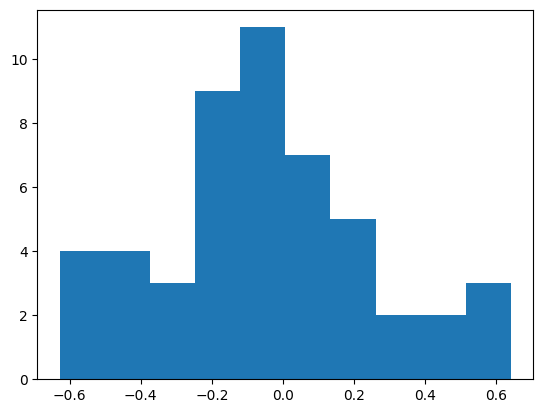

In [110]:
plt.hist(params["params"]["kernel"].ravel())
plt.show()

In [111]:
jax.tree_util.tree_map(lambda x: x.shape, params)

{'params': {'bias': (5,), 'kernel': (10, 5)}}

In [115]:
result = layer.apply(params, mock_data) # this i y_predicted

In [114]:
layer # layer is just definition of operation

Dense(
    # attributes
    features = 5
    use_bias = True
    dtype = None
    param_dtype = float32
    precision = None
    kernel_init = init
    bias_init = zeros
    dot_general = None
    dot_general_cls = None
)

In [121]:
# result[2] = 300 # nope, no mutation allowed
# result.at[2] = 300 # works but DO NOT DO THAT - no mutation allowed !!!

# params = gd(params)

In [125]:
conv = nn.Conv(features = 20, kernel_size = 2)

In [126]:
# conv.init(key_weights, ---)

In [130]:
class CNN_JAX(nn.Module): # JAX nn not torch.nn

  @nn.compact
  def __call__(self, x):
    x = nn.Conv(32, 3)(x)
    x = nn.Dense(20)(x) # 20 params

    return x

https://github.com/google/flax/blob/main/examples/mnist/train.py

In [131]:
class CNN(nn.Module):
  """A simple CNN model."""

  @nn.compact
  def __call__(self, x):
    x = nn.Conv(features=32, kernel_size=(3, 3))(x)
    x = nn.relu(x)
    x = nn.avg_pool(x, window_shape=(2, 2), strides=(2, 2))
    x = nn.Conv(features=64, kernel_size=(3, 3))(x)
    x = nn.relu(x)
    x = nn.avg_pool(x, window_shape=(2, 2), strides=(2, 2))
    x = x.reshape((x.shape[0], -1))  # flatten
    x = nn.Dense(features=256)(x)
    x = nn.relu(x)
    x = nn.Dense(features=10)(x)
    return x


@jax.jit
def apply_model(state, images, labels):
  """Computes gradients, loss and accuracy for a single batch."""

  def loss_fn(params):
    logits = state.apply_fn({'params': params}, images)
    one_hot = jax.nn.one_hot(labels, 10)
    loss = jnp.mean(optax.softmax_cross_entropy(logits=logits, labels=one_hot))
    return loss, logits

  grad_fn = jax.value_and_grad(loss_fn, has_aux=True)
  (loss, logits), grads = grad_fn(state.params)
  accuracy = jnp.mean(jnp.argmax(logits, -1) == labels)
  return grads, loss, accuracy


In [132]:
# step RETURNS the gradients, so that they're not changed inplace
# this is a hollow function waiting to be called, so they are not actually calculated by inferrence

feed data with whatever you like, but leave shuffle to jax


https://github.com/google-research/vision_transformer

goes with jax

DeepMind - vision and reinforcement learning